In [89]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.cluster import DBSCAN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, GroupKFold, StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn import preprocessing 
from sklearn import tree 
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(rc={'figure.figsize':(16,12)})

In [90]:
data_path = "playground-series-s3e23"

In [136]:
df_train = pd.read_csv(data_path+"\\train.csv",index_col=0)
df_test = pd.read_csv(data_path+"\\test.csv")


# Basic EDA

% 7. Attribute Information:

%      1. loc             : numeric % McCabe's line count of code

%      2. v(g)            : numeric % McCabe "cyclomatic complexity"

%      3. ev(g)           : numeric % McCabe "essential complexity"

%      4. iv(g)           : numeric % McCabe "design complexity"

%      5. n               : numeric % Halstead total operators + operands

%      6. v               : numeric % Halstead "volume"

%      7. l               : numeric % Halstead "program length"

%      8. d               : numeric % Halstead "difficulty"

%      9. i               : numeric % Halstead "intelligence"

%     10. e               : numeric % Halstead "effort"

%     11. b               : numeric % Halstead 

%     12. t               : numeric % Halstead's time estimator

%     13. lOCode          : numeric % Halstead's line count

%     14. lOComment       : numeric % Halstead's count of lines of comments

%     15. lOBlank         : numeric % Halstead's count of blank lines

%     16. lOCodeAndComment: numeric

%     17. uniq_Op         : numeric % unique operators

%     18. uniq_Opnd       : numeric % unique operands

%     19. total_Op        : numeric % total operators

%     20. total_Opnd      : numeric % total operands

%     21: branchCount     : numeric % of the flow graph

%     22. defects         : {false,true} % module has/has not one or more 

%


In [92]:
#We need to convert bool to integer values
#encoding defects
#label_encoder = preprocessing.LabelEncoder() 
#df_train['defects']= label_encoder.fit_transform(df_train['defects'])
df_train['defects'] = df_train['defects'].replace({True: 1, False: 0})

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101762
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loc                101763 non-null  float64
 1   v(g)               101763 non-null  float64
 2   ev(g)              101763 non-null  float64
 3   iv(g)              101763 non-null  float64
 4   n                  101763 non-null  float64
 5   v                  101763 non-null  float64
 6   l                  101763 non-null  float64
 7   d                  101763 non-null  float64
 8   i                  101763 non-null  float64
 9   e                  101763 non-null  float64
 10  b                  101763 non-null  float64
 11  t                  101763 non-null  float64
 12  lOCode             101763 non-null  int64  
 13  lOComment          101763 non-null  int64  
 14  lOBlank            101763 non-null  int64  
 15  locCodeAndComment  101763 non-null  int64  
 16  un

In [93]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67842 entries, 101763 to 169604
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                67842 non-null  float64
 1   v(g)               67842 non-null  float64
 2   ev(g)              67842 non-null  float64
 3   iv(g)              67842 non-null  float64
 4   n                  67842 non-null  float64
 5   v                  67842 non-null  float64
 6   l                  67842 non-null  float64
 7   d                  67842 non-null  float64
 8   i                  67842 non-null  float64
 9   e                  67842 non-null  float64
 10  b                  67842 non-null  float64
 11  t                  67842 non-null  float64
 12  lOCode             67842 non-null  int64  
 13  lOComment          67842 non-null  int64  
 14  lOBlank            67842 non-null  int64  
 15  locCodeAndComment  67842 non-null  int64  
 16  uniq_Op         

The given data has no issues with missing data.

<Axes: >

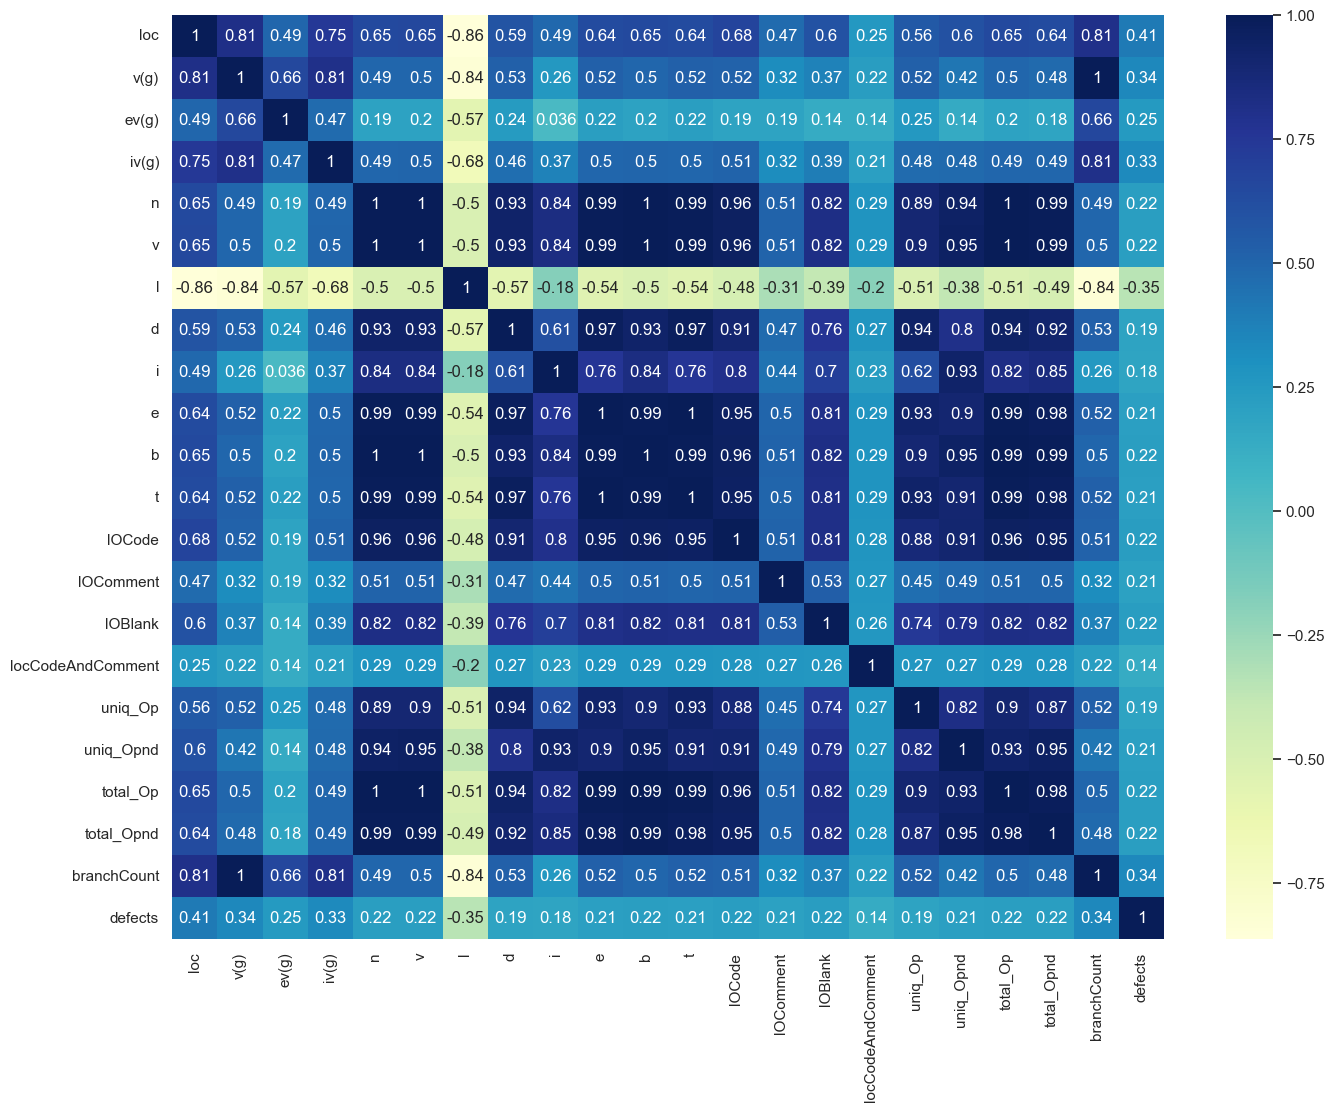

In [94]:
sns.heatmap(df_train.corr(method='spearman'), cmap="YlGnBu", annot=True) 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'loc'),
  Text(1, 0, 'v(g)'),
  Text(2, 0, 'ev(g)'),
  Text(3, 0, 'iv(g)'),
  Text(4, 0, 'n'),
  Text(5, 0, 'v'),
  Text(6, 0, 'l'),
  Text(7, 0, 'd'),
  Text(8, 0, 'i'),
  Text(9, 0, 'e'),
  Text(10, 0, 'b'),
  Text(11, 0, 't'),
  Text(12, 0, 'lOCode'),
  Text(13, 0, 'lOComment'),
  Text(14, 0, 'lOBlank'),
  Text(15, 0, 'locCodeAndComment'),
  Text(16, 0, 'uniq_Op'),
  Text(17, 0, 'uniq_Opnd'),
  Text(18, 0, 'total_Op'),
  Text(19, 0, 'total_Opnd'),
  Text(20, 0, 'branchCount'),
  Text(21, 0, 'defects')])

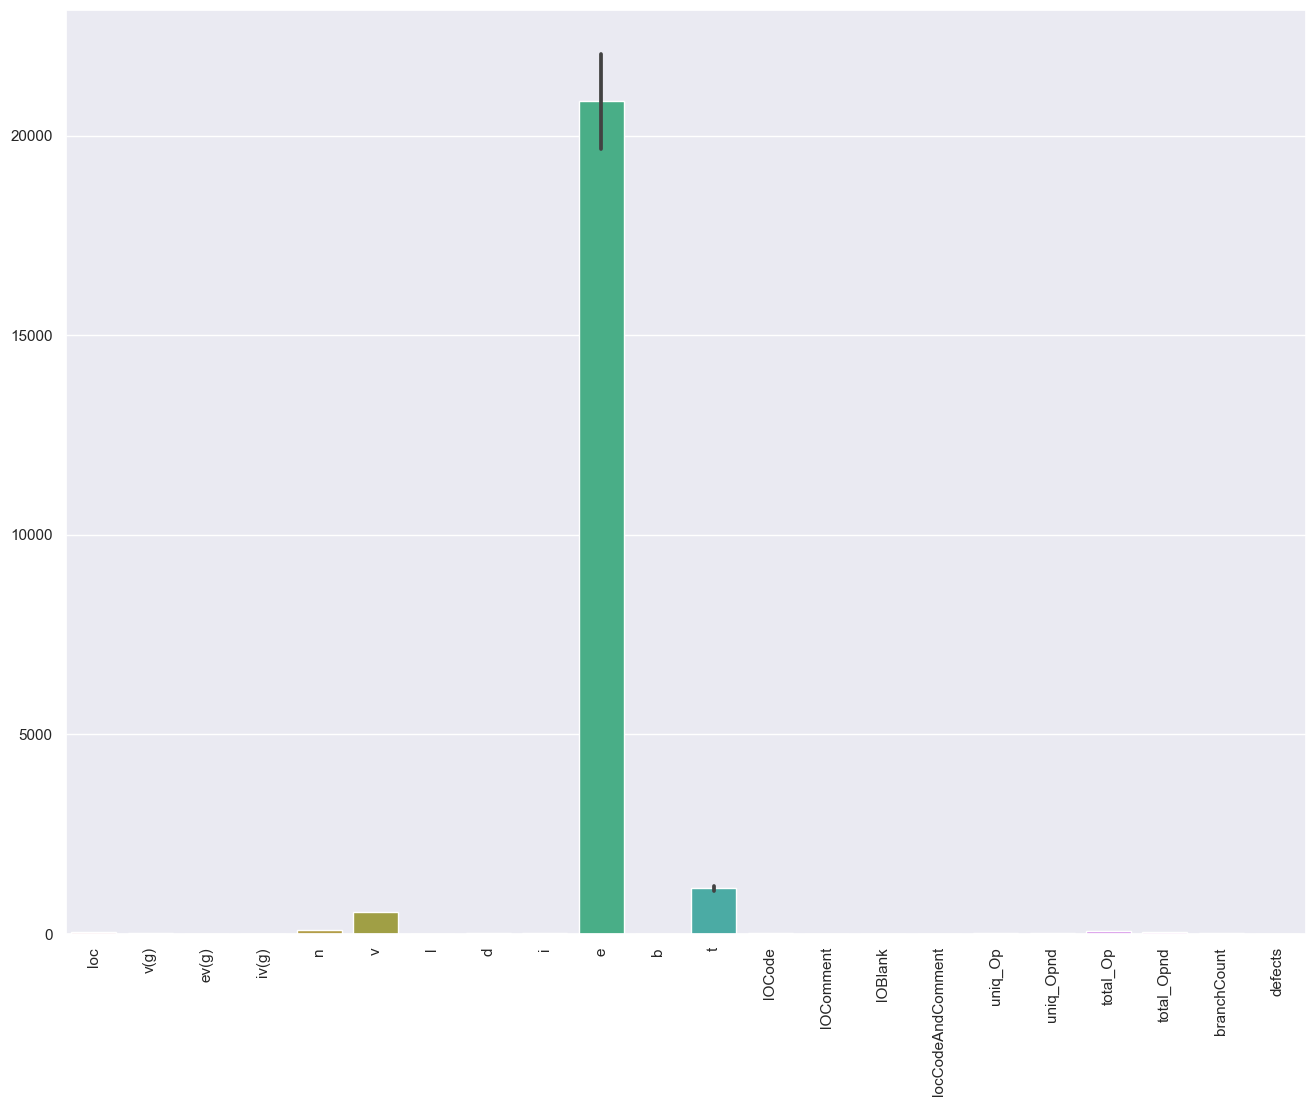

In [95]:
sns.barplot(data=df_train)
plt.xticks(rotation=90)


In [96]:
#Clearly Normalization is required
#scaler = MinMaxScaler()
#scaler.fit(df_train)
#df_train_normalized = pd.DataFrame(scaler.transform(df_train), columns=df_train.columns)


# Begin Model Analysis

# Preparing data for Training

In [97]:
X = df_train.drop("defects", axis=1)
y = df_train["defects"]
X_test = df_test

## Spliting Dataset to train, validate and test

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Initialize Table of Model Performances

In [99]:
model_metrics = pd.DataFrame(columns=['model','accuracy_score','precision_score','recall_score','f1_score','roc_auc_score'])

## Tree

### Descision Tree

In [100]:
if False:
        DTC_tree = DecisionTreeClassifier()
        params={
                'criterion':['gini', 'entropy', 'log_loss'],
                'splitter': ['best', 'random'],
                'max_depth': [None,5,10,50,100,150, 200],
                'min_samples_split': [2],
                'min_samples_leaf': [1],
                'min_weight_fraction_leaf':[0],
                'max_features': ['sqrt', 'log2'],
                'random_state': [42],
                }
        gs=GridSearchCV(estimator=DTC_tree, param_grid=params, cv=None) 
        gs = gs.fit(X, y)
        best_params=gs.best_params_ 
        accuracy=gs.best_score_ 
        print('best_params:','\n',best_params)
        print('accuracy:','\n',accuracy)


In [101]:
DTC_tree = DecisionTreeClassifier()

DTC_tree.fit(X_train,y_train)
predicted_value = DTC_tree.predict(X_test)
#tree.plot_tree(DTC_tree)
roc = roc_auc_score(y_train, DTC_tree.predict_proba(X_train)[:, 1])
model_metrics.loc[len(model_metrics.index)] = ['Descision Tree', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value),roc]  



### Extra Tree Classifier

In [102]:
if False:
        ETC_tree = ExtraTreeClassifier()
        params={
                'criterion':['gini', 'entropy', 'log_loss'],
                'splitter': ['best', 'random'],
                'max_depth': [None,5,10,50,100,150, 200],
                'min_samples_split': [2],
                'min_samples_leaf': [1],
                'min_weight_fraction_leaf':[0],
                'max_features': ['sqrt', 'log2'],
                'random_state': [42],
                }
        gs=GridSearchCV(estimator=ETC_tree, param_grid=params, cv=None) 
        gs = gs.fit(X, y)
        best_params=gs.best_params_ 
        accuracy=gs.best_score_ 
        print('best_params:','\n',best_params)
        print('accuracy:','\n',accuracy)


In [103]:
ETC_tree = ExtraTreeClassifier()
ETC_tree.fit(X_train,y_train)
predicted_value = ETC_tree.predict(X_test)
roc = roc_auc_score(y_train, ETC_tree.predict_proba(X_train)[:, 1])

model_metrics.loc[len(model_metrics.index)] = ['Extra Tree Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value),roc] 


## Neighbours

### KNeighborsClassifier

In [104]:
if False:        
        KNC = KNeighborsClassifier()
        params={
                'n_neighbors': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91,101],
                'weights': ['uniform', 'distance'], 
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
                }
        gs=GridSearchCV(estimator=KNC, param_grid=params, cv=None) 
        gs = gs.fit(X, y)
        best_params=gs.best_params_ 
        accuracy=gs.best_score_ 
        print('best_params:','\n',best_params)
        print('accuracy:','\n',accuracy)


In [105]:
KNC = KNeighborsClassifier()
KNC.fit(X_train,y_train)
predicted_value = KNC.predict(X_test)
roc = roc_auc_score(y_train, KNC.predict_proba(X_train)[:, 1])
model_metrics.loc[len(model_metrics.index)] = ['K Neighbours Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value),roc] 


## Naive Bayes

### BernoulliNB

In [106]:
BNB = BernoulliNB()
BNB.fit(X_train,y_train)
predicted_value = BNB.predict(X_test)
roc = roc_auc_score(y_train, BNB.predict_proba(X_train)[:, 1])

model_metrics.loc[len(model_metrics.index)] = ['Naive Bayes', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value),roc] 


## Bagging Classifier

In [107]:
if False:
    acc_all = []
    for n in range(50,500,50):
        BClassifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n)
        BClassifier.fit(X_train,y_train)
        predicted_value = BClassifier.predict(X_test)
        acc_all.append(accuracy_score(y_test, predicted_value))
        print(n,'\t:\t',acc_all[-1])
    print("Best Performing N Estimator")
    print("N\t:\tAcc")
    print(list(range(50,500,50))[acc_all.index(max(acc_all))],'\t:\t',max(acc_all))

In [108]:
dts = DecisionTreeClassifier(**{
    'criterion': 'entropy',
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0,
    'random_state': 42,
    'splitter': 'best'
    })
BClassifier = BaggingClassifier(estimator=dts, n_estimators=450)
BClassifier.fit(X_train,y_train)
predicted_value = BClassifier.predict(X_test)
roc = roc_auc_score(y_train, BClassifier.predict_proba(X_train)[:, 1])

model_metrics.loc[len(model_metrics.index)] = ['Bagging Descision Tree Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value),roc] 


In [109]:
ETC_tree = ExtraTreeClassifier(**{
    'criterion': 'entropy',
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0,
    'random_state': 42,
    'splitter': 'best'
 })
BClassifier = BaggingClassifier(estimator=ETC_tree, n_estimators=450)
BClassifier.fit(X_train,y_train)
predicted_value = BClassifier.predict(X_test)
roc = roc_auc_score(y_train, BClassifier.predict_proba(X_train)[:, 1])

model_metrics.loc[len(model_metrics.index)] = ['Bagging Extra Tree Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value),roc] 


## Boosting

### Gradient Bosting

In [110]:
if False:        
        GBoosting = GradientBoostingClassifier()
        params={
                'n_estimators': [100, 200, 300, 400, 500, 600],
                'learning_rate': [0.05, 0.1], 
                'max_depth': [1, 2, 3, 4, 5], 
                'random_state' : [42]
                }
        gs=GridSearchCV(estimator=GBoosting, param_grid=params, cv=None) 
        gs = gs.fit(X, y)
        best_params=gs.best_params_ 
        accuracy=gs.best_score_ 
        print( 'best_params:','\n',best_params)
        print('accuracy:','\n',accuracy)


In [111]:
GBoosting = GradientBoostingClassifier()
GBoosting.fit(X_train,y_train)
predicted_value = GBoosting.predict(X_test)
roc = roc_auc_score(y_train, GBoosting.predict_proba(X_train)[:, 1])

model_metrics.loc[len(model_metrics.index)] = ['Gradient Boosting', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value),roc] 


### AdaBoostClassifier

In [112]:
if False:        
        Ada = AdaBoostClassifier()
        params={
                'n_estimators': [100, 200, 300, 400, 500, 600],
                'learning_rate': [0.05, 0.1],
                'random_state' : [42]
                }
        gs=GridSearchCV(estimator=Ada, param_grid=params, cv=None) 
        gs = gs.fit(X, y)
        best_params=gs.best_params_ 
        accuracy=gs.best_score_ 
        print( 'best_params:','\n',best_params)
        print('accuracy:','\n',accuracy)


In [113]:
Ada = AdaBoostClassifier()
Ada.fit(X_train,y_train)
predicted_value = Ada.predict(X_test)
roc = roc_auc_score(y_train, Ada.predict_proba(X_train)[:, 1])

model_metrics.loc[len(model_metrics.index)] = ['Ada Boosting', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value),roc] 


### XGBClassifier

In [114]:
if False:        
        xgb = XGBClassifier()
        params={
                'booster':['gbtree'],
                'lambda' : [0, 0.5, 1],
                'alpha' : [0, 0.5, 1],
                'random_state' : [42]
                }
        gs=GridSearchCV(estimator=xgb, param_grid=params, cv=None) 
        gs = gs.fit(X, y)
        best_params=gs.best_params_ 
        accuracy=gs.best_score_ 
        print( 'best_params:','\n',best_params)
        print('accuracy:','\n',accuracy)


In [115]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
predicted_value = xgb.predict(X_test)
roc = roc_auc_score(y_train, xgb.predict_proba(X_train)[:, 1])

model_metrics.loc[len(model_metrics.index)] = ['XGBoost Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value),roc] 


## LGBM Classifier

In [116]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
predicted_value = lgbm.predict(X_test)
roc = roc_auc_score(y_train, lgbm.predict_proba(X_train)[:, 1])
model_metrics.loc[len(model_metrics.index)] = ['LGBM Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value),roc] 


[LightGBM] [Info] Number of positive: 15510, number of negative: 52671
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3534
[LightGBM] [Info] Number of data points in the train set: 68181, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.227483 -> initscore=-1.222580
[LightGBM] [Info] Start training from score -1.222580


## CatBoost Classifier

In [117]:
cat  = CatBoostClassifier()
cat.fit(X_train,y_train)
predicted_value = cat.predict(X_test)
roc = roc_auc_score(y_train, cat.predict_proba(X_train)[:, 1])

model_metrics.loc[len(model_metrics.index)] = ['CatBoost Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value),roc] 


Learning rate set to 0.062504
0:	learn: 0.6581569	total: 35.6ms	remaining: 35.5s
1:	learn: 0.6273262	total: 71.6ms	remaining: 35.7s
2:	learn: 0.6009066	total: 105ms	remaining: 35s
3:	learn: 0.5785278	total: 141ms	remaining: 35.2s
4:	learn: 0.5596266	total: 173ms	remaining: 34.4s
5:	learn: 0.5428307	total: 207ms	remaining: 34.2s
6:	learn: 0.5280494	total: 248ms	remaining: 35.2s
7:	learn: 0.5155055	total: 294ms	remaining: 36.4s
8:	learn: 0.5043621	total: 331ms	remaining: 36.5s
9:	learn: 0.4952464	total: 366ms	remaining: 36.3s
10:	learn: 0.4873259	total: 403ms	remaining: 36.3s
11:	learn: 0.4803395	total: 441ms	remaining: 36.3s
12:	learn: 0.4737021	total: 474ms	remaining: 36s
13:	learn: 0.4686092	total: 508ms	remaining: 35.8s
14:	learn: 0.4643608	total: 542ms	remaining: 35.6s
15:	learn: 0.4605142	total: 576ms	remaining: 35.4s
16:	learn: 0.4570241	total: 610ms	remaining: 35.3s
17:	learn: 0.4536430	total: 646ms	remaining: 35.2s
18:	learn: 0.4508292	total: 687ms	remaining: 35.5s
19:	learn: 0.

# Observations

In [118]:
model_metrics.sort_values(by=['accuracy_score'],ascending=False)

,model,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
4,Bagging Descision Tree Classifier,0.815407,0.648999,0.390654,0.487728,0.828077
5,Bagging Extra Tree Classifier,0.815348,0.648976,0.390124,0.487309,0.827769
6,Gradient Boosting,0.815348,0.645141,0.398067,0.492345,0.798507
9,LGBM Classifier,0.814782,0.645253,0.392243,0.487897,0.822393
10,CatBoost Classifier,0.813680,0.641935,0.388271,0.483874,0.835340
7,Ada Boosting,0.812876,0.642313,0.379402,0.477031,0.792536
8,XGBoost Classifier,0.811298,0.632831,0.383770,0.477792,0.854663
2,K Neighbours Classifier,0.788220,0.541588,0.380990,0.447311,0.881914
3,Naive Bayes,0.770264,0.469427,0.163622,0.242662,0.656736
1,Extra Tree Classifier,0.723304,0.391293,0.414085,0.402367,1.000000


In [119]:
model_metrics.sort_values(by=['roc_auc_score'],ascending=False)

,model,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
0,Descision Tree,0.721101,0.390288,0.426661,0.407665,1.000000
1,Extra Tree Classifier,0.723304,0.391293,0.414085,0.402367,1.000000
2,K Neighbours Classifier,0.788220,0.541588,0.380990,0.447311,0.881914
8,XGBoost Classifier,0.811298,0.632831,0.383770,0.477792,0.854663
10,CatBoost Classifier,0.813680,0.641935,0.388271,0.483874,0.835340
4,Bagging Descision Tree Classifier,0.815407,0.648999,0.390654,0.487728,0.828077
5,Bagging Extra Tree Classifier,0.815348,0.648976,0.390124,0.487309,0.827769
9,LGBM Classifier,0.814782,0.645253,0.392243,0.487897,0.822393
6,Gradient Boosting,0.815348,0.645141,0.398067,0.492345,0.798507
7,Ada Boosting,0.812876,0.642313,0.379402,0.477031,0.792536


# Implimenting Ensemble Methods

## Stacking Classifier

In [120]:

base_models = [
    ('catboost', CatBoostClassifier()),
    ('xgb', XGBClassifier())
    
]
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
predicted_value = stacking_clf.predict(X_test)
roc = roc_auc_score(y_train, stacking_clf.predict_proba(X_train)[:, 1])

model_metrics.loc[len(model_metrics.index)] = ['Stacking Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value),roc] 

Learning rate set to 0.062504
0:	learn: 0.6581569	total: 32.9ms	remaining: 32.9s
1:	learn: 0.6273262	total: 67.5ms	remaining: 33.7s
2:	learn: 0.6009066	total: 105ms	remaining: 34.9s
3:	learn: 0.5785278	total: 145ms	remaining: 36.1s
4:	learn: 0.5596266	total: 186ms	remaining: 36.9s
5:	learn: 0.5428307	total: 226ms	remaining: 37.4s
6:	learn: 0.5280494	total: 268ms	remaining: 38s
7:	learn: 0.5155055	total: 308ms	remaining: 38.1s
8:	learn: 0.5043621	total: 346ms	remaining: 38.1s
9:	learn: 0.4952464	total: 385ms	remaining: 38.1s
10:	learn: 0.4873259	total: 430ms	remaining: 38.6s


11:	learn: 0.4803395	total: 487ms	remaining: 40.1s
12:	learn: 0.4737021	total: 548ms	remaining: 41.6s
13:	learn: 0.4686092	total: 612ms	remaining: 43.1s
14:	learn: 0.4643608	total: 668ms	remaining: 43.9s
15:	learn: 0.4605142	total: 732ms	remaining: 45s
16:	learn: 0.4570241	total: 791ms	remaining: 45.7s
17:	learn: 0.4536430	total: 853ms	remaining: 46.5s
18:	learn: 0.4508292	total: 919ms	remaining: 47.5s
19:	learn: 0.4482723	total: 968ms	remaining: 47.4s
20:	learn: 0.4462631	total: 1.01s	remaining: 47.1s
21:	learn: 0.4444063	total: 1.06s	remaining: 46.9s
22:	learn: 0.4428388	total: 1.1s	remaining: 46.7s
23:	learn: 0.4415042	total: 1.15s	remaining: 46.6s
24:	learn: 0.4399789	total: 1.19s	remaining: 46.4s
25:	learn: 0.4389348	total: 1.23s	remaining: 45.9s
26:	learn: 0.4378727	total: 1.26s	remaining: 45.6s
27:	learn: 0.4369846	total: 1.32s	remaining: 46s
28:	learn: 0.4363067	total: 1.37s	remaining: 45.8s
29:	learn: 0.4355542	total: 1.41s	remaining: 45.7s
30:	learn: 0.4349422	total: 1.46s	re

## Voting Classifier

In [121]:
base_models = [
    ('catboost', CatBoostClassifier()),
    ('xgb', XGBClassifier())
    
]

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=base_models,
    voting='soft'  # Can be changed to 'soft' if desired
)

# Fit the Voting Classifier
voting_clf.fit(X_train, y_train)
predicted_value = voting_clf.predict(X_test)
roc = roc_auc_score(y_train, voting_clf.predict_proba(X_train)[:, 1])
model_metrics.loc[len(model_metrics.index)] = ['Voting Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value),roc] 

Learning rate set to 0.062504
0:	learn: 0.6581569	total: 37.7ms	remaining: 37.6s
1:	learn: 0.6273262	total: 76.5ms	remaining: 38.2s
2:	learn: 0.6009066	total: 112ms	remaining: 37.4s
3:	learn: 0.5785278	total: 148ms	remaining: 36.7s
4:	learn: 0.5596266	total: 182ms	remaining: 36.1s
5:	learn: 0.5428307	total: 211ms	remaining: 35s
6:	learn: 0.5280494	total: 247ms	remaining: 35.1s
7:	learn: 0.5155055	total: 281ms	remaining: 34.9s
8:	learn: 0.5043621	total: 318ms	remaining: 35s
9:	learn: 0.4952464	total: 365ms	remaining: 36.2s
10:	learn: 0.4873259	total: 405ms	remaining: 36.4s
11:	learn: 0.4803395	total: 443ms	remaining: 36.5s
12:	learn: 0.4737021	total: 496ms	remaining: 37.7s
13:	learn: 0.4686092	total: 548ms	remaining: 38.6s
14:	learn: 0.4643608	total: 580ms	remaining: 38.1s
15:	learn: 0.4605142	total: 612ms	remaining: 37.6s
16:	learn: 0.4570241	total: 642ms	remaining: 37.1s
17:	learn: 0.4536430	total: 676ms	remaining: 36.9s
18:	learn: 0.4508292	total: 714ms	remaining: 36.8s
19:	learn: 0.

In [122]:
model_metrics.sort_values(by=['roc_auc_score'],ascending=False)

,model,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
0,Descision Tree,0.721101,0.390288,0.426661,0.407665,1.000000
1,Extra Tree Classifier,0.723304,0.391293,0.414085,0.402367,1.000000
2,K Neighbours Classifier,0.788220,0.541588,0.380990,0.447311,0.881914
8,XGBoost Classifier,0.811298,0.632831,0.383770,0.477792,0.854663
12,Voting Classifier,0.813442,0.641183,0.387477,0.483043,0.847900
11,Stacking Classifier,0.813799,0.648347,0.376357,0.476254,0.839685
10,CatBoost Classifier,0.813680,0.641935,0.388271,0.483874,0.835340
4,Bagging Descision Tree Classifier,0.815407,0.648999,0.390654,0.487728,0.828077
5,Bagging Extra Tree Classifier,0.815348,0.648976,0.390124,0.487309,0.827769
9,LGBM Classifier,0.814782,0.645253,0.392243,0.487897,0.822393


# Final Model

In [124]:
base_models = [
    ('catboost', CatBoostClassifier()),
    ('xgb', XGBClassifier())
    
]

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=base_models,
    voting='soft'  # Can be changed to 'soft' if desired
)

# Fit the Voting Classifier
voting_clf.fit(X, y)
predicted_value = voting_clf.predict(X_test)


Learning rate set to 0.074161
0:	learn: 0.6512521	total: 31.6ms	remaining: 31.6s
1:	learn: 0.6166368	total: 64.3ms	remaining: 32.1s
2:	learn: 0.5874225	total: 101ms	remaining: 33.4s
3:	learn: 0.5625754	total: 132ms	remaining: 33s
4:	learn: 0.5420647	total: 165ms	remaining: 32.9s
5:	learn: 0.5255257	total: 199ms	remaining: 32.9s
6:	learn: 0.5112395	total: 239ms	remaining: 33.9s
7:	learn: 0.4989839	total: 274ms	remaining: 34s
8:	learn: 0.4888994	total: 308ms	remaining: 33.9s
9:	learn: 0.4808072	total: 342ms	remaining: 33.8s
10:	learn: 0.4737100	total: 374ms	remaining: 33.6s
11:	learn: 0.4678480	total: 408ms	remaining: 33.6s
12:	learn: 0.4624839	total: 437ms	remaining: 33.2s
13:	learn: 0.4579933	total: 471ms	remaining: 33.2s
14:	learn: 0.4544804	total: 505ms	remaining: 33.1s
15:	learn: 0.4508297	total: 536ms	remaining: 33s
16:	learn: 0.4480681	total: 568ms	remaining: 32.9s
17:	learn: 0.4458942	total: 602ms	remaining: 32.8s
18:	learn: 0.4440409	total: 635ms	remaining: 32.8s
19:	learn: 0.44

In [139]:
final = pd.DataFrame()
final['id'] = df_test['id']
df_test = df_test.drop("id", axis=1)
predicted_value = voting_clf.predict_proba(df_test)[:, 1]
final['Exited'] = predicted_value
final.to_csv('submission.csv', index=False)
final.head()

,id,Exited
0,101763,0.224734
1,101764,0.178943
2,101765,0.659092
3,101766,0.498171
4,101767,0.141010
